# Get the Data 

In [114]:
import pandas as pd 

data = pd.read_csv("../datasets/attribute_set/train_val_data_fine_grained_all.csv", index_col=0) 

In [115]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16000 entries, 0 to 1999
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   paths            16000 non-null  object
 1   floral           16000 non-null  int64 
 2   graphic          16000 non-null  int64 
 3   striped          16000 non-null  int64 
 4   embroidered      16000 non-null  int64 
 5   pleated          16000 non-null  int64 
 6   solid            16000 non-null  int64 
 7   lattice          16000 non-null  int64 
 8   long_sleeve      16000 non-null  int64 
 9   short_sleeve     16000 non-null  int64 
 10  sleeveless       16000 non-null  int64 
 11  maxi_length      16000 non-null  int64 
 12  mini_length      16000 non-null  int64 
 13  no_dress         16000 non-null  int64 
 14  crew_neckline    16000 non-null  int64 
 15  v_neckline       16000 non-null  int64 
 16  square_neckline  16000 non-null  int64 
 17  no_neckline      16000 non-null 

In [116]:
data["paths"] = data.paths.apply(lambda s: s.replace("img-001/img", "img_highres/img_highres"))
data.head() 

,paths,floral,graphic,striped,embroidered,pleated,solid,lattice,long_sleeve,short_sleeve,...,no_neckline,denim,chiffon,cotton,leather,faux,knit,tight,loose,conventional
0,../datasets/big_ds/img_highres/img_highres/Swe...,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
1,../datasets/big_ds/img_highres/img_highres/Cla...,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
2,../datasets/big_ds/img_highres/img_highres/Str...,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,../datasets/big_ds/img_highres/img_highres/Mid...,0,0,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,1,0,0
4,../datasets/big_ds/img_highres/img_highres/Zip...,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1


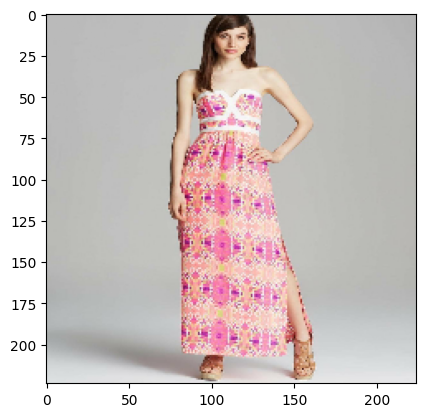

In [117]:
from helpers import show_image
show_image(data.iat[2,0])

In [118]:
data = data.loc[:, [
    "paths",
    "floral", 
    "graphic" ,
    "striped",
    "embroidered",
    "solid",
    "lattice",
    "denim",
    "chiffon",
    "cotton",
    "leather",
    "faux",
    "knit",
    "tight",
    "loose"
]]

In [119]:
data.columns = [
    "paths",
    "cicekli", 
    "baskili", 
    "duz-cizgi",
    "islemeli", 
    "solid", 
    "kafes",
    "denim",
    "sifon", 
    "pamuk", 
    "deri", 
    "kurk", 
    "orme", 
    "dar",
    "bol-gevsek" 
]

In [120]:
for c in data.columns[1:]: 
    print(f"{c} , positive: {len(data[data[c] == 1])} negative: {len(data[data[c] == 0])} ")

cicekli , positive: 2738 negative: 13262 
baskili , positive: 2678 negative: 13322 
duz-cizgi , positive: 1055 negative: 14945 
islemeli , positive: 1329 negative: 14671 
solid , positive: 7584 negative: 8416 
kafes , positive: 280 negative: 15720 
denim , positive: 949 negative: 15051 
sifon , positive: 2342 negative: 13658 
pamuk , positive: 10868 negative: 5132 
deri , positive: 330 negative: 15670 
kurk , positive: 143 negative: 15857 
orme , positive: 1368 negative: 14632 
dar , positive: 2296 negative: 13704 
bol-gevsek , positive: 868 negative: 15132 


In [121]:
# data = data.drop(["kafes", "deri", "kurk"], axis=1) 

In [122]:
DATA_SIZE = data.shape[0]
TRAIN_SIZE = int(0.70 * DATA_SIZE)
TRAIN_SIZE 

11200

# Shuffle Training Data 

In [123]:
data = data.sample(frac=1, random_state=128)
trainig_data = data.iloc[:TRAIN_SIZE, :].reset_index(drop=True)
val_data = data.iloc[TRAIN_SIZE:, :].reset_index(drop=True)
trainig_data.shape, val_data.shape, data.shape 

((11200, 15), (4800, 15), (16000, 15))

In [124]:
trainig_data.head() 

,paths,cicekli,baskili,duz-cizgi,islemeli,solid,kafes,denim,sifon,pamuk,deri,kurk,orme,dar,bol-gevsek
0,../datasets/big_ds/img_highres/img_highres/Cow...,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,../datasets/big_ds/img_highres/img_highres/Dip...,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,../datasets/big_ds/img_highres/img_highres/Hea...,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,../datasets/big_ds/img_highres/img_highres/Dai...,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,../datasets/big_ds/img_highres/img_highres/Tas...,0,0,0,1,0,0,0,0,0,0,0,1,0,0


# Distribution of Train - Val Set 

In [125]:
import seaborn as sns 
import matplotlib.pyplot as plt 

def show_distribution(dt: pd.DataFrame):
    train_dist = dict()
    for c in dt.columns[1:]: 
        train_dist[c] = len(dt[dt[c] == 1]) 

    train_dist = pd.DataFrame.from_dict(train_dist, orient="index").reset_index()
    train_dist.columns= ["rows", "vals"]

    sns.barplot(x="rows", y="vals", data=train_dist)
    plt.show()

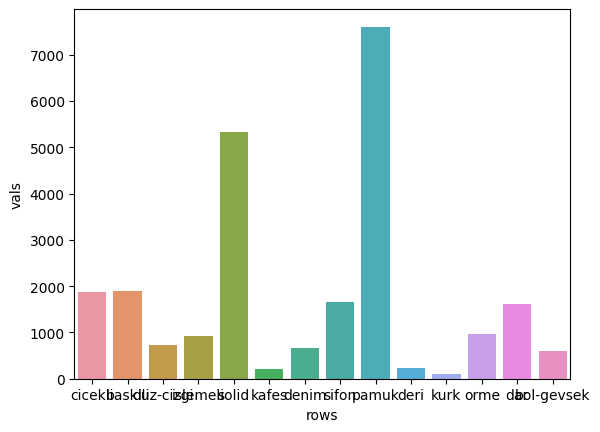

In [126]:
show_distribution(trainig_data)

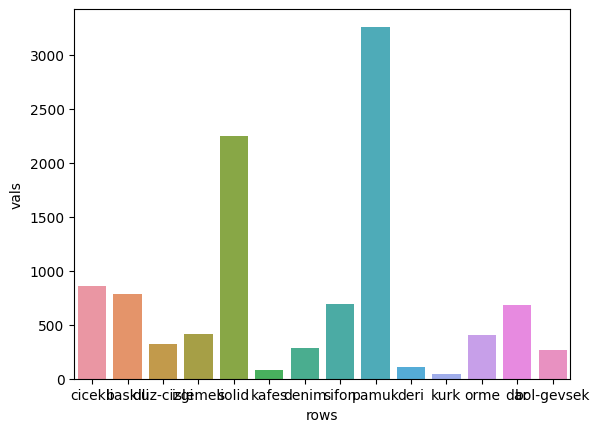

In [127]:
show_distribution(val_data)

# Create Keras Data Generators 

In [128]:
X_train = trainig_data.iloc[:, 0] 
y_train = trainig_data.iloc[:, 1:]

X_test = val_data.iloc[:, 0] 
y_test = val_data.iloc[:, 1:] 

In [129]:
merged_all_classes = [] 
for idx, row in y_train.iterrows():
    merged_all_classes.append([col for col, val in row.items() if val == 1])

y_train = pd.Series(merged_all_classes, index=y_train.index, name="labels") 

merged_all_classes = [] 
for idx, row in y_test.iterrows():
    merged_all_classes.append([col for col, val in row.items() if val == 1])

y_test = pd.Series(merged_all_classes, index=y_test.index, name="labels") 

In [130]:
train_data_flow_df = pd.concat([
    X_train, 
    y_train
], axis=1)

test_data_flow_df = pd.concat([
    X_test, 
    y_test
], axis=1) 

In [131]:
IMG_WIDTH = 456 
IMG_HEIGHT = 456 
nr_of_classes = 14

In [132]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

train_gen = ImageDataGenerator() 
test_gen = ImageDataGenerator()

In [133]:
train = train_gen.flow_from_dataframe(
    dataframe=train_data_flow_df, 
    directory="", 
    x_col="paths", 
    y_col="labels", 
    class_mode='categorical', 
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    shuffle=False)

test = test_gen.flow_from_dataframe(
    dataframe=test_data_flow_df, 
    directory="", 
    x_col="paths", 
    y_col="labels", 
    class_mode='categorical', 
    target_size=(IMG_WIDTH, IMG_HEIGHT))

Found 11200 validated image filenames belonging to 14 classes.
Found 4800 validated image filenames belonging to 14 classes.


In [134]:
train.class_indices

{'baskili': 0,
 'bol-gevsek': 1,
 'cicekli': 2,
 'dar': 3,
 'denim': 4,
 'deri': 5,
 'duz-cizgi': 6,
 'islemeli': 7,
 'kafes': 8,
 'kurk': 9,
 'orme': 10,
 'pamuk': 11,
 'sifon': 12,
 'solid': 13}

In [135]:
test.class_indices

{'baskili': 0,
 'bol-gevsek': 1,
 'cicekli': 2,
 'dar': 3,
 'denim': 4,
 'deri': 5,
 'duz-cizgi': 6,
 'islemeli': 7,
 'kafes': 8,
 'kurk': 9,
 'orme': 10,
 'pamuk': 11,
 'sifon': 12,
 'solid': 13}

# Test Data 

In [136]:
test_data = pd.read_csv("../datasets/attribute_set/test_data_fine_grained.csv", index_col=0)
test_data["paths"] = test_data.paths.apply(lambda s: s.replace("img-001/img", "img_highres/img_highres"))

test_data = test_data.loc[:, [
    "paths",
    "floral", 
    "graphic" ,
    "striped",
    "embroidered",
    "solid",
    "lattice",
    "denim",
    "chiffon",
    "cotton",
    "leather",
    "faux",
    "knit",
    "tight",
    "loose"
]]

test_data.columns = [
    "paths",
    "cicekli", 
    "baskili", 
    "duz-cizgi",
    "islemeli", 
    "solid", 
    "kafes",
    "denim",
    "sifon", 
    "pamuk", 
    "deri", 
    "kurk", 
    "orme", 
    "dar",
    "bol-gevsek" 
]

test_data.head() 

,paths,cicekli,baskili,duz-cizgi,islemeli,solid,kafes,denim,sifon,pamuk,deri,kurk,orme,dar,bol-gevsek
0,../datasets/big_ds/img_highres/img_highres/Flo...,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,../datasets/big_ds/img_highres/img_highres/But...,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,../datasets/big_ds/img_highres/img_highres/Mar...,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,../datasets/big_ds/img_highres/img_highres/Sun...,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,../datasets/big_ds/img_highres/img_highres/Col...,0,0,0,0,1,0,0,1,0,0,0,0,0,0


In [137]:
from PIL import Image
import os

max_pixel_limit = 178956970
batch=0
i = 0

for k,row in test_data.iterrows():
    try:
        image = Image.open(row["paths"])
        total_pixels = image.size[0] * image.size[1]
        if total_pixels > max_pixel_limit:
            print(f"Removed {i} - Exceeds pixel limit")

        i = i + 1 
        if i >= 31:
            i = 0 
            batch = batch + 1 
    except Exception as e:
        print(f"batch:{batch} index:{k}")



batch:121 index:3778


In [138]:
test_data = test_data.drop([3778])

In [139]:
X_test2 = test_data.iloc[:, 0] 
y_test2 = test_data.iloc[:, 1:] 

merged_all_classes = [] 
for idx, row in y_test2.iterrows():
    merged_all_classes.append([col for col, val in row.items() if val == 1])

y_test2 = pd.Series(merged_all_classes, index=y_test2.index, name="labels") 

test2_data_flow_df = pd.concat([
    X_test2, 
    y_test2
], axis=1) 

In [140]:
test2_gen = ImageDataGenerator() 
test_2 = test2_gen.flow_from_dataframe(
    dataframe=test2_data_flow_df, 
    directory="", 
    x_col="paths", 
    y_col="labels", 
    class_mode='categorical', 
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    shuffle=False)

Found 3999 validated image filenames belonging to 14 classes.


In [141]:
test_2.class_indices

{'baskili': 0,
 'bol-gevsek': 1,
 'cicekli': 2,
 'dar': 3,
 'denim': 4,
 'deri': 5,
 'duz-cizgi': 6,
 'islemeli': 7,
 'kafes': 8,
 'kurk': 9,
 'orme': 10,
 'pamuk': 11,
 'sifon': 12,
 'solid': 13}

In [142]:
test_data = pd.concat([test_data.paths,
                        test_data.loc[:, sorted(test_data.columns.tolist()[1:])]], 
                        axis=1)

# Model 1: EfficientNetB5 

In [143]:
from tensorflow import keras 
import tensorflow as tf 

In [144]:
model_1_loaded = tf.keras.models.load_model("../trained_models/efnet_high_res_based12.h5")

In [145]:
# model_1_loaded.evaluate(test_2)

In [146]:
from helpers import predict 
y_preds = predict(test_data.paths.to_numpy(), model_1_loaded, dims=(456, 456, 3))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
100 th iteration. You have 3999 inputs. 
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
200 th iteration. You have 3999 inputs. 
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
25

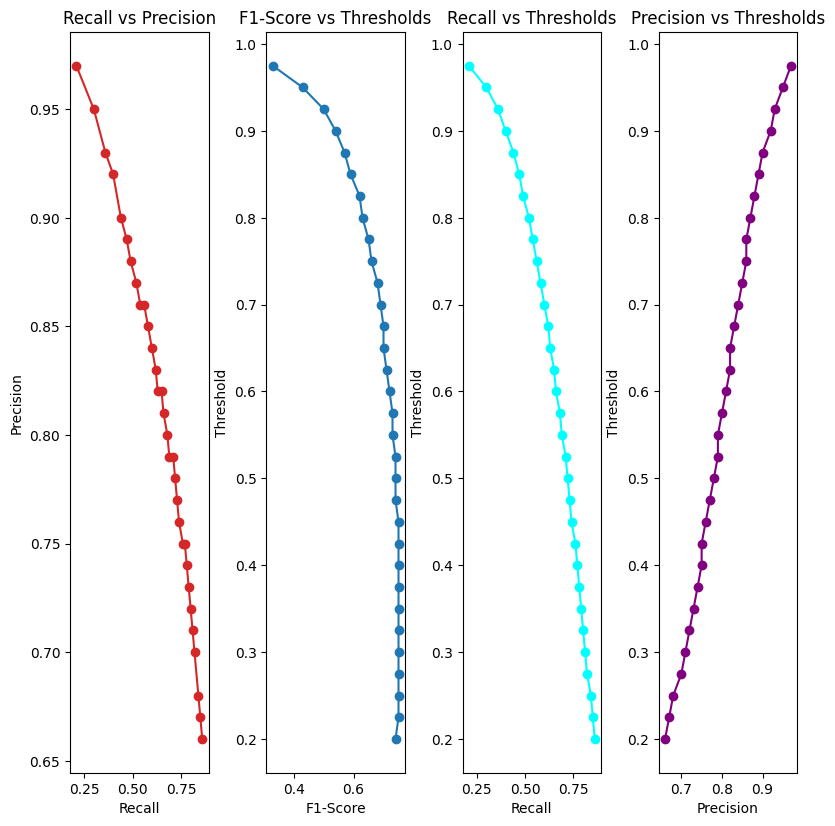

In [147]:
from helpers import plot_recall_precision_curve
import numpy as np 
plot_recall_precision_curve(np.squeeze(y_preds),test_data.iloc[:, 1:].to_numpy())

In [148]:
model_1_loaded.evaluate(test_2)

125/125 [==============================] - 2749s 22s/step - loss: 0.1857 - accuracy: 0.9257 - precision: 0.7881 - recall: 0.7154


[0.18573661148548126,
 0.9257314205169678,
 0.7880702614784241,
 0.7153837084770203]

In [156]:
from sklearn.metrics import multilabel_confusion_matrix
y_hats = np.squeeze(y_preds)
y_hats[y_hats >= 0.5] = 1 
y_hats[y_hats < 0.5] = 0 

conf_mat = multilabel_confusion_matrix(test_data.iloc[:, 1:].to_numpy(), y_hats)

In [157]:
TP_ACC = 0 
FP_ACC = 0 
FN_ACC = 0 
for mat in conf_mat: 
    TP_ACC +=  mat[1][1] 
    FP_ACC += mat[0][1]
    FN_ACC += mat[1][0] 

print("micro average precision:", TP_ACC / (TP_ACC + FP_ACC))
print("micro average recall:", TP_ACC / (TP_ACC + FN_ACC))

micro average precision: 0.7862806796727502
micro average recall: 0.7166456349661581


In [159]:
PREC_ACC = 0 
REC_ACC = 0 

for mat in conf_mat: 
    PREC_ACC += mat[1][1]  / (mat[1][1]  + mat[0][1])
    REC_ACC += mat[1][1]  / (mat[1][1]  + mat[1][0])

print("macro average precision:", PREC_ACC / len(conf_mat))
print("macro average recall:", REC_ACC / len(conf_mat))

macro average precision: 0.750320480943296
macro average recall: 0.5594862036084278


- Micro Average: This average metric is suitable when you want to weigh each instance equally, regardless of class imbalance. It calculates precision and recall by considering the total number of true positives, false positives, and false negatives across all classes. Micro average tends to be more influenced by the majority class, making it suitable when you want to prioritize overall performance rather than individual class performance.

- Macro Average: This average metric treats each class equally and calculates precision and recall separately for each class. It then takes the average of these values, giving equal importance to each class. Macro average is useful when you want to assess the performance of the classifier across all classes independently, without considering class imbalance. It provides a balanced view of performance across all classes.

- Weighted Average: This average metric also calculates precision and recall for each class separately. However, it takes into account the class imbalance by weighting each class's metric score based on the number of samples in that class. Weighted average provides a more accurate evaluation when you want to consider the impact of class imbalance on the overall performance.

In [167]:
cls_results = [] 
for i,mat in enumerate(conf_mat):
    PREC = mat[1][1]  / (mat[1][1]  + mat[0][1])
    REC = mat[1][1]  / (mat[1][1]  + mat[1][0])
    cls_results.append({"class": test_data.columns[i+1], "precision": PREC, "recall": REC}) 

pd.DataFrame(cls_results)

,class,precision,recall
0,baskili,0.707635,0.568862
1,bol-gevsek,0.514286,0.179104
2,cicekli,0.796767,0.519578
3,dar,0.713733,0.620168
4,denim,0.783654,0.665306
5,deri,0.640000,0.210526
6,duz-cizgi,0.796296,0.736301
7,islemeli,0.675000,0.559172
8,kafes,0.906250,0.467742
9,kurk,0.928571,0.565217


## Prediction 

1/1 [==============================] - 2s 2s/step


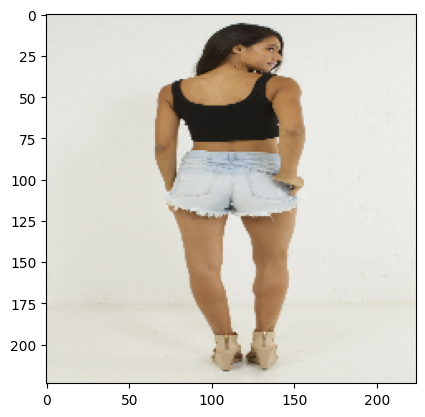

688


,baskili,bol-gevsek,cicekli,dar,denim,deri,duz-cizgi,islemeli,kafes,kurk,orme,pamuk,sifon,solid
actual,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
predictions,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [230]:
from helpers import show_image, evaluate_img
import random 

x = random.randint(0, test_data.shape[0])
x = test_data[test_data.solid==1].index.tolist()[random.randint(0,500)]
pred = evaluate_img(test_data.paths.tolist()[x], model=model_1_loaded, columns=list(test_data.columns[1:]), threshold=0.35)
show_image(test_data.paths.tolist()[x])
print(x)
pd.DataFrame([test_data.iloc[x,1:].values ,pred.values], columns=test_data.columns[1:], index=["actual", "predictions"])

1/1 [==============================] - 6s 6s/step
baskili       0.0
bol-gevsek    0.0
cicekli       1.0
dar           0.0
denim         0.0
deri          0.0
duz-cizgi     0.0
islemeli      0.0
kafes         0.0
kurk          0.0
orme          1.0
pamuk         0.0
sifon         1.0
solid         0.0
dtype: float32


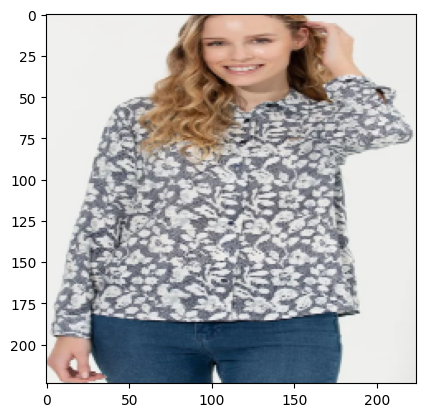

In [209]:
path = "../datasets/demos/floral.PNG"
print(evaluate_img(path, model=model_1_loaded, columns=list(test_data.columns[1:]), threshold=0.3))
show_image(path)

1/1 [==============================] - 3s 3s/step
baskili       0.0
bol-gevsek    1.0
cicekli       0.0
dar           0.0
denim         0.0
deri          0.0
duz-cizgi     1.0
islemeli      0.0
kafes         0.0
kurk          0.0
orme          1.0
pamuk         0.0
sifon         0.0
solid         1.0
dtype: float32


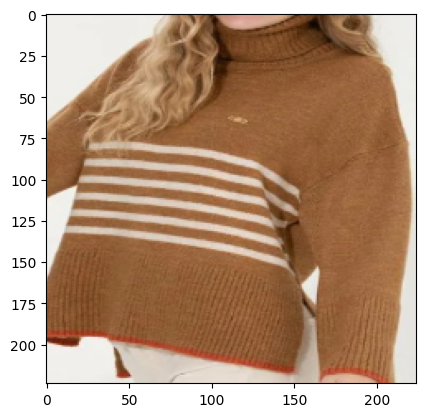

In [206]:
path = "../datasets/demos/melanj_uspa.PNG"
print(evaluate_img(path, model=model_1_loaded, columns=list(test_data.columns[1:]), threshold=0.2))
show_image(path)

1/1 [==============================] - 3s 3s/step
baskili       0.0
bol-gevsek    0.0
cicekli       0.0
dar           0.0
denim         0.0
deri          0.0
duz-cizgi     0.0
islemeli      0.0
kafes         1.0
kurk          0.0
orme          0.0
pamuk         1.0
sifon         1.0
solid         1.0
dtype: float32


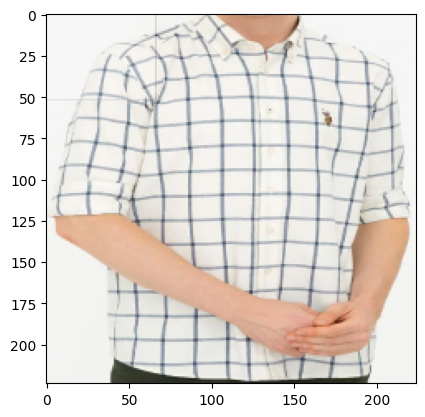

In [212]:
path = "../datasets/demos/uspa_sq.PNG"
print(evaluate_img(path, model=model_1_loaded, columns=list(test_data.columns[1:]), threshold=0.30))
show_image(path)

1/1 [==============================] - 3s 3s/step
baskili       1.0
bol-gevsek    0.0
cicekli       0.0
dar           0.0
denim         0.0
deri          0.0
duz-cizgi     0.0
islemeli      0.0
kafes         0.0
kurk          0.0
orme          0.0
pamuk         1.0
sifon         0.0
solid         0.0
dtype: float32


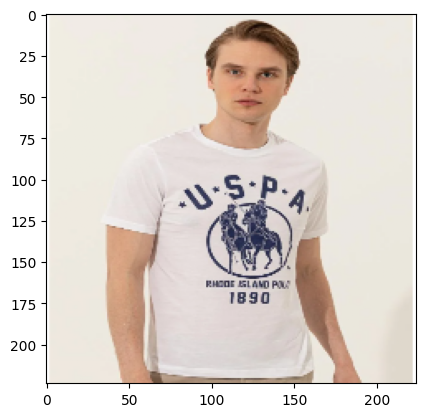

In [231]:
path = "../datasets/demos/baskili.PNG"
print(evaluate_img(path, model=model_1_loaded, columns=list(test_data.columns[1:]), threshold=0.30))
show_image(path)

1/1 [==============================] - 4s 4s/step
baskili       0.0
bol-gevsek    0.0
cicekli       0.0
dar           0.0
denim         0.0
deri          1.0
duz-cizgi     0.0
islemeli      0.0
kafes         0.0
kurk          0.0
orme          0.0
pamuk         1.0
sifon         0.0
solid         1.0
dtype: float32


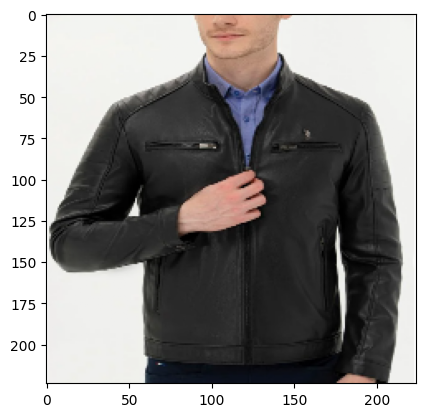

In [232]:
path = "../datasets/demos/deri.PNG"
print(evaluate_img(path, model=model_1_loaded, columns=list(test_data.columns[1:]), threshold=0.30))
show_image(path)

1/1 [==============================] - 6s 6s/step
baskili       0.0
bol-gevsek    0.0
cicekli       0.0
dar           0.0
denim         0.0
deri          0.0
duz-cizgi     1.0
islemeli      0.0
kafes         0.0
kurk          0.0
orme          0.0
pamuk         1.0
sifon         0.0
solid         0.0
dtype: float32


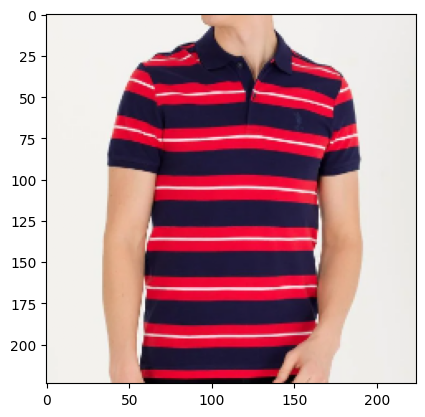

In [233]:
path = "../datasets/demos/net_cizgili.PNG"
print(evaluate_img(path, model=model_1_loaded, columns=list(test_data.columns[1:]), threshold=0.30))
show_image(path)